This notebook provides data and calculations for the ultimatum game experiments run at UBC over a number of years.  The current paper is called Behavioral Bargaining, a note describing the theoretical model (the paper isn't ready yet) is at [Behavioral Bargaining notes](https://montoya.econ.ubc.ca/Econ600/mike_reference_offer.pdf).  

The directions given to the subjects are given in [Instructions to applicants](https://montoya.econ.ubc.ca/Econ600/baseline0_script.pdf).

In [1]:
import pandas as pd
import os
import numpy as np
dataset = pd.read_csv('datamerged2.csv')

The game just consists of a series of offers and the response to those offers.  The offer, out of 55 is in the `value` field below.  If the responser accepted it, the corresponding entry in `resp` will be 1.

There were three rounds of experiments in 2006, 2010 and 2014.  The experiment is given in the `old` column, with 0 meaning 2014, 1 is 2010 and 2 is 2014.

There were 4 treatments in which lower bounds were imposed on the offers proposers were allowed to make treatment 1 means no floor at all, 2 means a floor of 10 dollars, 3 means a floor of of 2 dollars, 4 means a floor of 5 dollars. 

In [3]:
show(dataset)

id  treatment  tofrom  value  role  resp  round  rounds  old
0       1          1       6   20.0     0     1      1       2    0
1       1          1       9   20.0     0     0      1       2    0
2       1          1      10   20.0     0     1      1       2    0
3       1          1      11   20.0     0     1      1       2    0
4       1          1      13   20.0     0     1      1       2    0
5       1          1      14   20.0     0     1      1       2    0
6       1          1      16   20.0     0     1      1       2    0
7       1          1      17   20.0     0     1      1       2    0
8       1          1      18   20.0     0     1      2       2    0
9       1          1      19   20.0     0     1      2       2    0
10      1          1      23   20.0     0     1      2       2    0
11      1          1      26   20.0     0     1      2       2    0
12      1          1      27   20.0     0     1      2       2    0
13      1          1      28   20.0     0     1      2       2    0
14      1          1      31   20.0     0     1      2       2    0
15      1          1      32   20.0     0     1      2       2    0
16      2          1       9   20.0     0     1      1       2    0
17      2          1      10   20.0     0     1      1       2    0
18      2          1      11   20.1     0     1      1       2    0
19      2          1      13   20.0     0     1      1       2    0
20      2          1      14   20.0     0     1      1       2    0
21      2          1      16   20.0     0     1      1       2    0
22      2          1      17   20.5     0     1      1       2    0
23      2          1       6   20.0     0     1      1       2    0
24      2          1      19   16.0     0     1      2       2    0
25      2          1      23   16.0     0     1      2       2    0
26      2          1      26   16.0     0     1      2       2    0
27      2          1      27   16.0     0     1      2       2    0
28      2          1      28   16.0     0     1      2       2    0
29      2          1      31   16.0     0     1      2       2    0
...   ...        ...     ...    ...   ...   ...    ...     ...  ...
2063  267          4     287   10.0     0     1      2       2    2
2064  267          4     288    5.0     0     0      2       2    2
2065  268          4     282   15.0     0     1      2       2    2
2066  268          4     283   15.0     0     1      2       2    2
2067  268          4     284   15.0     0     1      2       2    2
2068  268          4     285   15.0     0     1      2       2    2
2069  268          4     286   15.0     0     1      2       2    2
2070  268          4     287   15.0     0     1      2       2    2
2071  268          4     288   15.0     0     1      2       2    2
2072  269          4     282   10.0     0     0      2       2    2
2073  269          4     283   10.0     0     1      2       2    2
2074  269          4     284   10.0     0     1      2       2    2
2075  269          4     285   10.0     0     0      2       2    2
2076  269          4     286   10.0     0     1      2       2    2
2077  269          4     287   10.0     0     1      2       2    2
2078  269          4     288   10.0     0     0      2       2    2
2079  270          4     275   20.0     0     1      2       2    2
2080  270          4     276   20.0     0     1      2       2    2
2081  270          4     277   20.0     0     1      2       2    2
2082  270          4     278   15.0     0     1      2       2    2
2083  270          4     279   20.0     0     1      2       2    2
2084  270          4     280   20.0     0     1      2       2    2
2085  270          4     281   15.0     0     1      2       2    2
2086  271          4     275   25.0     0     1      2       2    2
2087  271          4     276   30.0     0     1      2       2    2
2088  271          4     277   25.0     0     1      2       2    2
2089  271          4     278   30.0     0     1      2       2 

In [4]:
dataset.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.0,2093.000000,2093.000000,2093.000000,2093.000000
mean,136.852365,2.424749,144.307692,18.792203,0.0,0.814620,1.607740,2.215002,0.701386
std,81.562400,1.241298,86.824111,7.226530,0.0,0.388698,0.617988,0.410922,0.730504
min,1.000000,1.000000,6.000000,0.000000,0.0,0.000000,1.000000,2.000000,0.000000
25%,65.000000,1.000000,68.000000,15.000000,0.0,1.000000,1.000000,2.000000,0.000000
50%,133.000000,3.000000,145.000000,20.000000,0.0,1.000000,2.000000,2.000000,1.000000
75%,211.000000,4.000000,225.000000,25.000000,0.0,1.000000,2.000000,2.000000,1.000000
max,276.000000,4.000000,288.000000,49.000000,0.0,1.000000,3.000000,3.000000,2.000000


This summary indicates that the mean offer was just less than 19 dollars, which is low relative to what happens in other ultimatum game experiments.  The variable `resp` has a mean of .81.  Since `resp` is a binary variable that is 1 when an offer is accepted and 0 otherwise, that means that 81% of all offers were accepted.

In [66]:
dataset.value.value_counts(sort=False,bins=50
                        )

(-0.05, 0.98]       2
(0.98, 1.96]        1
(1.96, 2.94]       13
(2.94, 3.92]        5
(3.92, 4.9]        14
(4.9, 5.88]        95
(5.88, 6.86]        5
(6.86, 7.84]       16
(7.84, 8.82]       16
(8.82, 9.8]        10
(9.8, 10.78]      187
(10.78, 11.76]     36
(11.76, 12.74]     20
(12.74, 13.72]     21
(13.72, 14.7]      24
(14.7, 15.68]     281
(15.68, 16.66]     62
(16.66, 17.64]     89
(17.64, 18.62]     73
(18.62, 19.6]      35
(19.6, 20.58]     338
(20.58, 21.56]     30
(21.56, 22.54]     43
(22.54, 23.52]     52
(23.52, 24.5]      29
(24.5, 25.48]     233
(25.48, 26.46]     60
(26.46, 27.44]     70
(27.44, 28.42]     68
(28.42, 29.4]      19
(29.4, 30.38]     108
(30.38, 31.36]      8
(31.36, 32.34]      1
(32.34, 33.32]      4
(33.32, 34.3]       2
(34.3, 35.28]       9
(35.28, 36.26]      1
(36.26, 37.24]      1
(37.24, 38.22]      3
(38.22, 39.2]       0
(39.2, 40.18]       3
(40.18, 41.16]      0
(41.16, 42.14]      0
(42.14, 43.12]      0
(43.12, 44.1]       0
(44.1, 45.

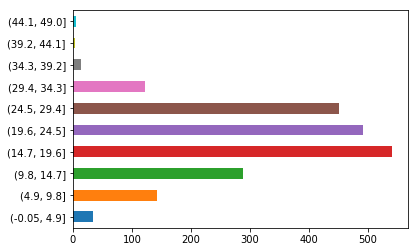

In [13]:
dataset.value.value_counts(sort=False,bins=10).plot(kind='barh')

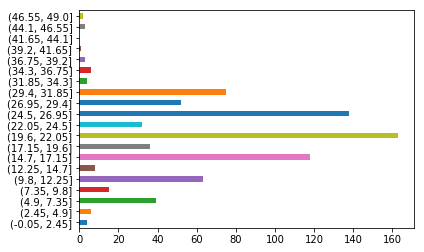

In [7]:
t1 = dataset.treatment == 1
treatment1=dataset[t1]
treatment1.value.value_counts(sort=false,bins=20).plot(kind='barh')

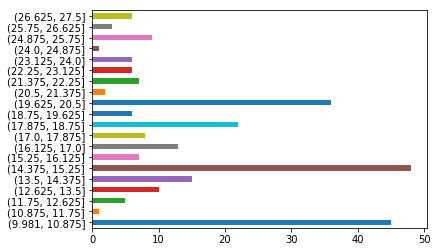

In [8]:
t2 = dataset.treatment == 2
treatment2=dataset[t2]
treatment2.value.value_counts(sort=false,bins=20).plot(kind='barh')

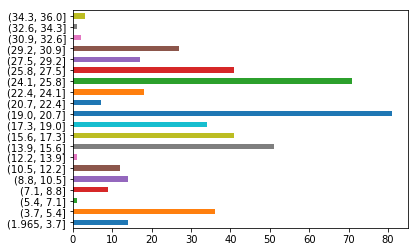

In [9]:
t3 = dataset.treatment == 3
treatment3=dataset[t3]
treatment3.value.value_counts(sort=false,bins=20).plot(kind='barh')

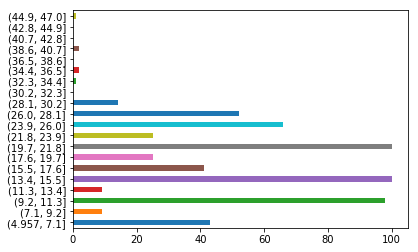

In [11]:
t4 = dataset.treatment == 4
treatment4=dataset[t4]
treatment4.value.value_counts(sort=false,bins=20).plot(kind='barh')

The last few counts and the bar chart indicate how widespread the offers are.  We want some kind of model that explains this dispersion.  There are many ways to do it.  The approach here uses loss aversion as the primary determinate.   We could have used a kind of variable altruism and spite.  So most of the experiments involved imposing lower limits on acceptable offers to induce a shift in the offers and acceptance probabilities in our model that wouldn't happen if altruisim and its counterpart, spite, were the only factors at play. 

A proposer and responder share a monetary payoff of size 1. The proposer offers some 
share of the payoff to the responder.  If the responder accepts, the responder gets
her share, the proposer gets the rest.  If the responder rejects, neither of them
get anything.



The model uses loss aversion  with an endogenous reference point as well as
other regarding preferences.
In the simplest version of loss aversion, the payoff is piecwise linear in money, and depends on a reference offer $r$. This is called constant loss aversion and comes from (Tversky and Kahnman 1991). 

Thinking of $x$ as the share of the payoff a player receives, this payoff would look like:
$$
U(x,\lambda,r)=\begin{cases}
x-r & if\;x\geq r\\
\lambda(x-r) & if\;x<r
\end{cases}
$$
Notice when the share is 0, the formula says the payoff to the responder is $-\lambda r$.

The term $\lambda\ge1$ is the degree of loss
aversion. The variable $\lambda$ which measures loss aversion is assumed privately known. It is common belief that it is independently drawn for each proposer and responder from distribution
$G$ which is assumed to have a compact support bounded below by $1$.  



This won't be quite enough to fit the data, so we'll add other regarding preferences. This consists of a spitefulness term when the other player gets a larger share, and a competitiveness term when the other other player gets a smaller share. To keep things simple, we'll assume the spitefulness term comes as a fixed cost. Alternatively the competitiveness term is a linear function as follows:
$$
V\left(x,y,\lambda,r\right)=\begin{cases}
x-r-\frac{1}{2} & 0\le x<y;s\ge r\\
\lambda\left(x-r\right)-\frac{1}{2} & 0<x<y;s<r\\
x-r+\alpha\left(x-y\right) & x\ge y;x\ge r\\
-\lambda r & x=y=0.
\end{cases}
$$

In this formula, $r$ is the reference offer and $\alpha$ is a positive constant. The reference offer
is the highest share a player believes he or she can get for sure.
For the responder, this will be the lowest offer she expects to receive
with positive probability. For the proposer, it is the lowest offer
he or she expects will be accepted by all responders.

Ideally, we would like to recover the distribution $G$, the reference offer for proposers, along with the constant $\alpha$ measuring the competitiveness term from the data on offers and responses.


Let $Q\left(s\right)$ be the probability with which a proposer expects
an offer of $s$ to a proposer to be accepted.  The proposer is intent on maximizing
$$
Q\left(s\right)\left(\left(1-s\right)+\alpha\left(1-2s\right)\right)-\left(1-Q\left(s\right)\right)\left(\lambda r\right).\label{proposer-payoff-1}
$$

Now each player must make a decision, for the proposer the offer, which will depend on his or her loss aversion $\lambda$.  For the responder
the decision is about what offers to accept and which to reject.  Again, this depends on her loss aversion parameter $\lambda$.



An equilibrium consists of a pair of functions $o(\lambda)$ which gives an offer to be made by a seller that depends on his type $\lambda$ and $a(\lambda)$ which denotes the lowest offer that is acceptable to a responser of type $\lambda$. 
First notice that whatever, the responder's reference offer happens
to be, she will accept an offer $s<\frac{1}{2}$ as long as
$$
s-r-\frac{1}{2}\ge-\lambda r.
$$
which is the same as the condition 
$$
\lambda \ge \frac{r-s+\frac{1}{2}}{r}
$$



From the proposer's prespective, the probability that an offer $s\ge r$ will the accepted is equal to 
$$
\mathbb{Pr}  { \lambda \ge \frac{r-s+\frac{1}{2}}{r} } = \int_{\frac{r-s+\frac{1}{2}}{r}}^{\overline{\lambda}}dG(\tilde{s})=1-G(\frac{r-s+\frac{1}{2}}{r})
$$

A similar calculation for $s<r$ gives the acceptance probability 
$$
Q(s) = 1-G(\frac{1}{2s}).
$$

As the acceptance probability already builds in the fact that a responder uses a best reply, an equilibrium is now described by an offer function $o(\lambda)$
 which satisfies
 $$
 Q\left(o(\lambda)\right)\left(\left(1-o(\lambda)\right)+\alpha\left(1-2o(\lambda)\right)\right)-\left(1-Q\left(o(\lambda)\right)\right)\left(\lambda r\right)
 \\
 \ge Q\left(s\right)\left(\left(1-s\right)+\alpha\left(1-2s\right)\right)-\left(1-Q\left(s\right)\right)\left(\lambda r\right)
 $$
 for all $\lambda\ge 1$. 

There is no interaction between proposer types, each type solves what appears to be a completely separate maximization problem.  This leads to the following somewhat intutive approach to the equilibrium.

For the most part, the equilibrium is straightforward. The function
$Q\left(s,r\right)$ defines a kind of budget set that determines
what $\left(\tilde{Q},\tilde{s}\right)$ pairs are attainable for
the proposer. The proposer then chooses a $\left(\tilde{Q},\tilde{s}\right)$
pair that that maximizes 
\begin{equation}
\tilde{Q}\left(1-\tilde{s}\left(1+2\alpha\right)+\alpha-\frac{1}{2}\right)+\left(1-\tilde{Q}\right)\left(-\lambda\frac{1}{2}\right)\label{surplus}
\end{equation}
 subject to $Q\left(\tilde{s},r\right)=\tilde{Q}$.


To understand the equilibrium just note the solution to each proposer's problem occurs where the level sets of the function above are tangent to the 'budget line' defined by the probabilitiy of acceptance function as in the following figure.


![equilibrium](mike_fig7.jpg)

The slope of an iso-surplus curve can be found by totally differentiating
the proposer's payoff with respect to $\tilde{s}$ and $\tilde{Q}$, then
setting the result to $0$ and solving for $\frac{d\tilde{Q}}{d\tilde{s}^{\prime}}$.
The result is
$$
I^{\prime}\left(\tilde{s},\tilde{Q},\lambda\right)=\frac{\tilde{Q}\left(1+2\alpha\right)}{\left\{ \left(1-\tilde{s}\left(1+2\alpha\right)+\alpha\right)+\frac{1}{2}\left(\lambda-1\right)\right\} }
$$
which is increasing in $\tilde{s}$ and $\tilde{Q}$ but falling in
$\lambda$. In this formula
$$
I\left(\tilde{s},\tilde{Q},\lambda:K\right)\equiv
\left\{ \tilde{Q}:\tilde{Q}\cdot\left(1-\tilde{s}\left(1+2\alpha\right)+\alpha-\frac{1}{2}\right)+\left(1-Q^{\prime}\right)\left(-\lambda\frac{1}{2}\right)=K\right\} .
$$



Now we write the first order condition by setting the slope of this iso-surplus line equal to the slope of the function that defines the probability of acceptance

$$
\frac{Q(s)\left(1+2\alpha\right)} { \left( 1-s\left(1+2\alpha\right)+\alpha\right) + \frac{1}{2} \left(\lambda-1\right) }
= Q^\prime(s)
$$

In this formula, the functions $Q(s)$  and $Q^\prime(s)$ are presumably estimated from the responders responses.

Now we can just solve this for $\lambda$ to get

$$
\lambda = \frac{2rQ(s)(1+2\alpha)}{Q^\prime(s)} - 2(1-s(1+2\alpha)) + 1 
$$

Now if we let $\psi(s)$ denote the empirical distribution of offers made by the proposers, we get

$$
\psi(s) = \hat{G}\left(\frac{2rQ(s)(1+2\alpha)}{Q^\prime(s)} - 2(1-s(1+2\alpha)) + 1, \alpha\right)
$$
where $\hat{G}(s,\alpha)$ is the apparent distribution of loss parameters.

Finally,  the probability that an offer $s$ is accepted empirically is $Q(s)$  which should coincide with 
$$
1-\hat{G}\left(\frac{r-s+\frac{1}{2}}{r},\alpha\right)
$$

In [2]:


var('x','s','r')
G = function('G')
Q = (1-G((r-s+1/2)/(r)))
Q.diff(s)

D[0](G)(1/2*(2*r - 2*s + 1)/r)/r

In [4]:
show(Q.diff(s).substitute(s=1/2))

D[0](G)(1)/r